## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Data preperation 

In [2]:
df = pd.read_csv("temperatures.csv")

In [3]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [4]:
df.shape

(117, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [6]:
#checking if there is any null data over their
df.isnull().sum().sum()

0

## Enter the month you want to anaylze

In [7]:
month = input("Enter the month in Capitals(Max 3 words): ")

Enter the month in Capitals(Max 3 words): MAR


## Visualization 

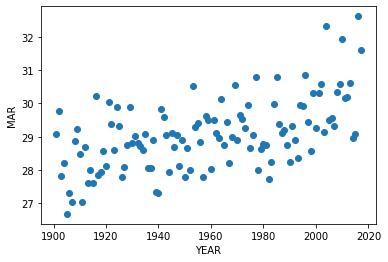

In [8]:
plt.scatter(df["YEAR"], df[month])
plt.xlabel("YEAR")
plt.ylabel(month)
plt.show()

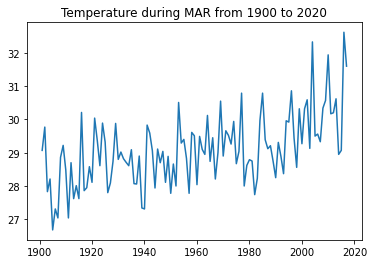

In [9]:
plt.plot(df["YEAR"], df[month])
plt.title("Temperature during %s from 1900 to 2020" %month)
plt.show()

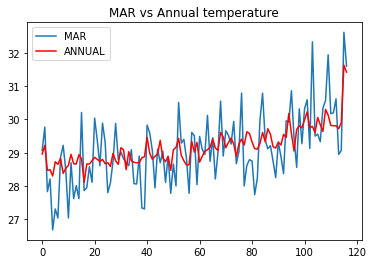

In [10]:
plt.plot(df[month], label=month)
plt.plot(df["ANNUAL"], color="red", label="ANNUAL")
plt.title("%s vs Annual temperature" %month)
plt.legend()
plt.show()

## Model creation 

In [11]:
# spliting the dataset and then creating model
X = df['YEAR'].values
Y = df[month]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [12]:
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (81, 1)
Shape of x_test:  (36, 1)
Shape of y_train:  (81,)
Shape of y_test:  (36,)


In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression()

In [15]:
print("Intercept: ", model.intercept_)
print("Coef: ", model.coef_)

Intercept:  1.7833619261050124
Coef:  [0.01394031]


In [16]:
y_pred = model.predict(x_test)

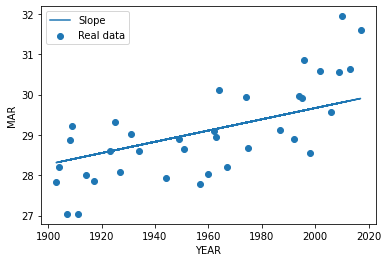

In [17]:
#checking the linear slope
plt.plot(x_test, y_pred, label="Slope")
plt.scatter(x_test, y_test, label="Real data")
plt.xlabel("YEAR")
plt.ylabel(month)
plt.legend()
plt.show()